# <font color='darkred'>LET'S CHANGE THE WORLD FOR BETTER CAUSE</font>

## <font color='firebrick'>X-Ray Image Prediction Pnuemonia</font>

# <font color='grey'>What is Pneumonia?</font>
**<font color='dimgray'>Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli.</font>
<br>-Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. 
<br>-The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.
<br>-Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. 
<br>-Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.**
![image.png](https://static.vecteezy.com/system/resources/previews/000/433/937/original/pneumonia-of-the-lungs-diagram-vector.jpg)

# <font color='grey'>Content</font>

### 1. Importing all the necessary Libraries
### 2. Loading the Dataset
### 3. Data Visualization and Data Preprocessing
### 4. Data Augmentaion 
### 5. Training the Model 
### 6. Analysis after training the model

# <font color='grey'>Importing the necessary libraries</font>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #For Plotting
import seaborn as sns  #For Plotting
import keras
from keras.models import Sequential  #For training model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization  #For training model
from keras.preprocessing.image import ImageDataGenerator  #For Data Augmentation
from sklearn.model_selection import train_test_split    #For splitting the data into train, valid, and test data
from sklearn.metrics import classification_report,confusion_matrix  #For analysis
from keras.callbacks import ReduceLROnPlateau  # For Learning Rate Reduction
import warnings

import cv2  #For Image Processing
import os   #For reading files

warnings.filterwarnings("ignore") 

# <font color='grey'>Description of the Pneumonia Dataset</font>
**The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).
Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.
For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.**

In [3]:
#creating labels with Pneumonia and Normal cases.
labels = ['PNEUMONIA', 'NORMAL']  

img_size = 150  # Most appropriate value for image size to display properly

#Creating a function to get training data and returning numpy array of data.
def get_training_data(data_dir):
    data = [] 
    for label in labels:   #Normal or Pnuemonia
        path = os.path.join(data_dir, label)  #storing the path of Normal and Pnuemonia
        class_num = labels.index(label)    #Storing index of label 
        for img in os.listdir(path):     #iterate over each image per normal and Pnuemonia X_ray
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)   #Convert to image array
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])   #append to data list
            except Exception as e:
                print(e)
    return np.array(data)

# <font color='grey'>Loading the Dataset</font>

In [4]:
#Using the get_training_data function, store the train data into train variable
train = get_training_data('D:\\Final_Summer_Project\\Chest_Xray_Pneumonia\\chest_xray\\train') 


In [5]:
# #Using the get_training_data function, store the respective data into the test and val variable
test = get_training_data('D:\\Final_Summer_Project\\Chest_Xray_Pneumonia\\chest_xray\\test')
val = get_training_data('D:\\Final_Summer_Project\\Chest_Xray_Pneumonia\\chest_xray\\val')

# <font color='grey'>Data Visualization & Preprocessing</font>

Total Number of Images : 5216


<AxesSubplot:ylabel='count'>

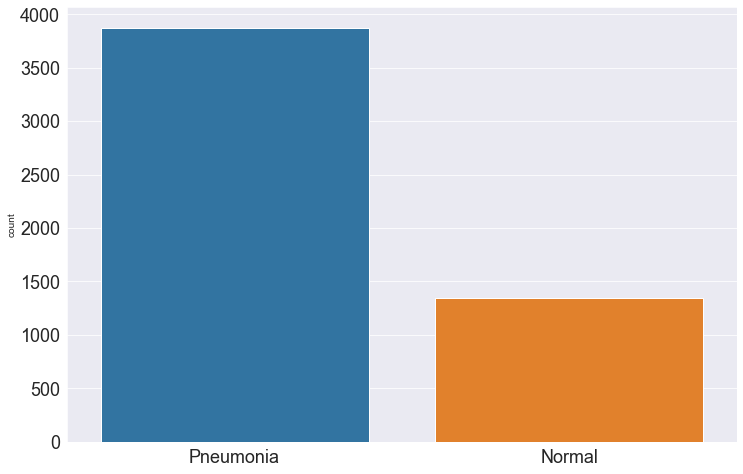

In [6]:
#Plotting the number of Pneumonia and Normal Images in dataset.

count_list = []
for i in train:
    if(i[1] == 0):
        count_list.append("Pneumonia")
    else:
        count_list.append("Normal")
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
sns.set_style('darkgrid')
print("Total Number of Images : " + str(len(train)))
sns.countplot(count_list)        

**Clearly we can see that the data seems imbalanced . To increase the number of training examples, we will use DATA AUGMENTATION**

###  **Previewing the images of both the classes**

Text(0.5, 1.0, 'NORMAL')

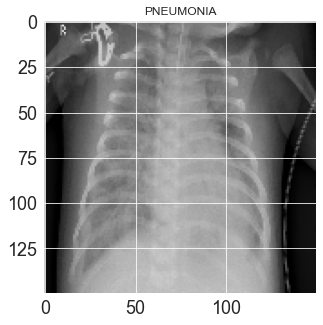

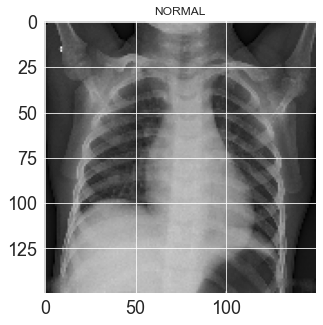

In [7]:
#PLoting the pneumonia image
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])


#PLoting the Normal image
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

#### We can observe from both the images that Pnuemonia X-Ray image is more saturated with white color as comparing to below normal case image.

#### Storing train , valid, and test images to feature(X) and label(y) list

In [8]:
#Creating a train list 
X_train = []
y_train = []

#Creating a Valid list 
X_val = []
y_val = []

#Creating a test list 
X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

**We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255]. (255 here is the maximum value of pixel)**

## <font color='grey'>Normalizing the data</font>

In [9]:
# Normalize the data by divind by maximum number of pixel i.e 255.
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255

#### Resizing the images  as list can't be used to train the CNN model, so we will reshape using .reshape method for deep learning 

## <font color='grey'>Resizing the data</font>

In [10]:
# resize data for deep learning 
X_train = X_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# <font color='grey'>Data Augmentation</font>
**In order to avoid overfitting problem, we need to expand artificially our dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations.
Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.
By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.**

In [11]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

For the data augmentation, I choosed to :
1. Randomly rotate some training images by **30** degrees 
2. Randomly Zoom by **20%** some training images
3. Randomly shift images horizontally by **10%** of the width 
4. Randomly shift images vertically by **10%** of the height 
5. Randomly flip images horizontally.<br>
Once our model is ready, we fit the training dataset.

# <font color='grey'>Training the Model</font>

In [12]:
#Using Sequential model

model = Sequential()

#Convolution layer 1
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

#Convolution layer 2
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

#Convolution layer 3
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

#Convolution layer 4
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

#Convolution layer 5
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

#Using a Flatter to change to 1D array for next layer
model.add(Flatten())

#Adding a Dense layer
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))

#Adding a output layer using Sigmoid Activation Function
model.add(Dense(units = 1 , activation = 'sigmoid'))

#Using RMSprop optimzer
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

#Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [13]:
#Defining the learning rate reduction to pass in the callback parameter during fitting of the model

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [14]:
#Fitting the model

history = model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(X_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 192s 1s/step - loss: 0.5215 - accuracy: 0.8355 - val_loss: 30.2624 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 186s 1s/step - loss: 0.2774 - accuracy: 0.8955 - val_loss: 93.1653 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - ETA: 0s - loss: 0.2410 - accuracy: 0.9143
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 184s 1s/step - loss: 0.2410 - accuracy: 0.9143 - val_loss: 33.6418 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 183s 1s/step - loss: 0.1589 - accuracy: 0.9454 - val_loss: 1.3614 - val_accuracy: 0.8125 - lr: 3.0000e-04
Epoch 5/12
163/163 [==============================] - 190s 1s/step - loss: 0.1445 - accuracy: 0.9492 - val_loss: 46.4963 - val_accuracy: 0.5000 - lr: 3.0000e-04
Epoch 6/12
163/163 [===========================

# <font color='grey'>Evaluating the test data Accuracy and Loss</font>

In [15]:
#Printing the model accuracy and loss of the test data.

print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

20/20 [==============================] - 5s 231ms/step - loss: 0.3237 - accuracy: 0.9247
Loss of the model is -  0.3237099051475525
20/20 [==============================] - 5s 231ms/step - loss: 0.3237 - accuracy: 0.9247
Accuracy of the model is -  92.46794581413269 %


# <font color='grey'>Analysis after Model Training / Plots / Metrics</font>

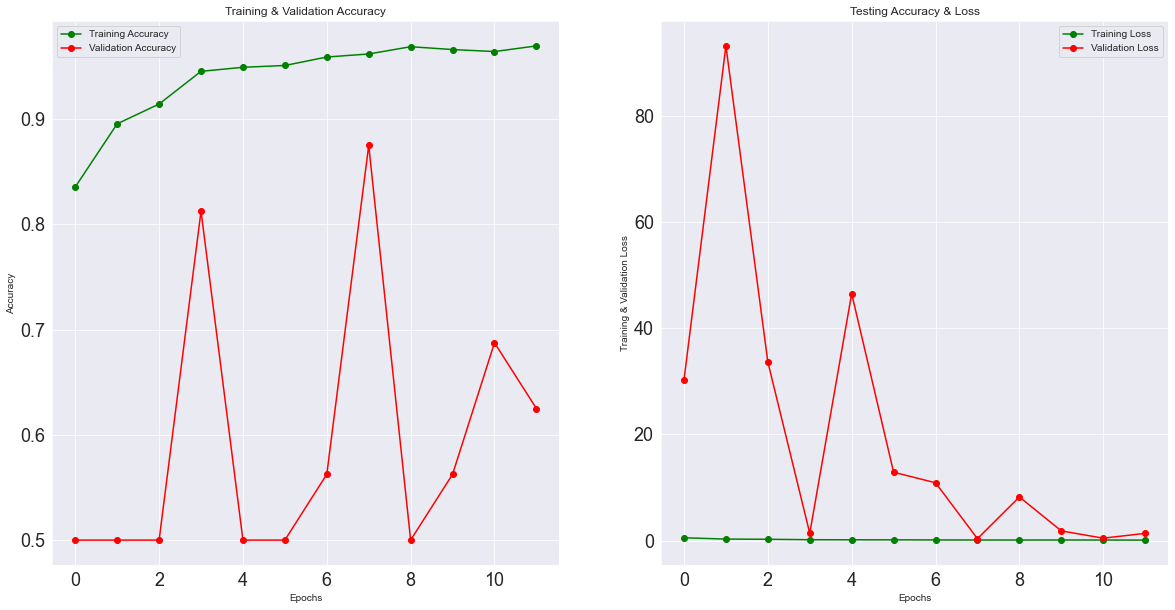

In [16]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [17]:
# predictions = model.predict(X_test)
predictions = model.predict(X_test)
threshold = 0.5
predictions = np.where(predictions > threshold, 1,0)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

20/20 [==============================] - 5s 218ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

## <font color='grey'>Classification Report</font>

In [18]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.92      0.96      0.94       390
   Normal (Class 1)       0.93      0.87      0.90       234

           accuracy                           0.92       624
          macro avg       0.93      0.91      0.92       624
       weighted avg       0.92      0.92      0.92       624



## <font color='grey'>Confusion Matrix</font> 

In [19]:
#Defining confusion matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[374,  16],
       [ 31, 203]], dtype=int64)

In [20]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<AxesSubplot:>

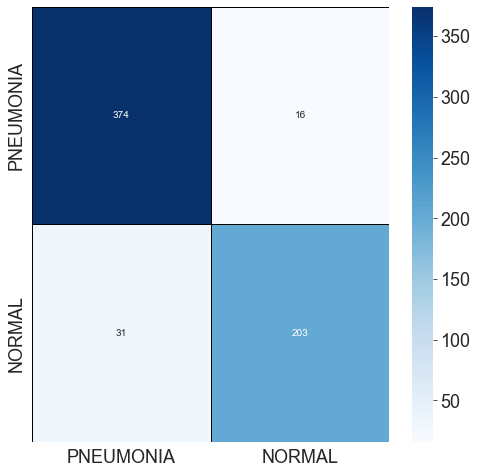

In [21]:
plt.figure(figsize = (8,8))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [22]:
#Defining the correct and incorrect classes
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

**Some of the Correctly Predicted Classes**

## <font color='grey'>Correct Classes</font>

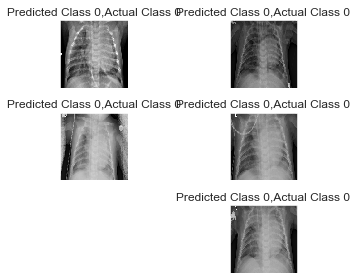

In [23]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

**Some of the Incorrectly Predicted Classes**

## <font color='grey'>InCorrect Classes</font>

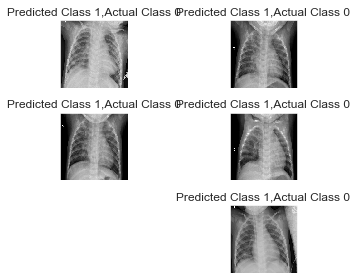

In [24]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1